In [1]:
class Polynomial:
    def __init__(self, *args):
        if len(args) > 0:
            if len(args) == 1 and type(args[0]) is np.ndarray:
                self.degree = len(args[0]) - 1
                self.coefficients = args[0]
            else:
                self.degree = len(args) - 1
                if USE_FRACTION:
                    self.coefficients = np.array(list(map(Fraction, args)))
                else:
                    self.coefficients = np.array(list(map(float, args)))
        else:
            self.degree = 0
            self.coefficients = np.array([0])
        self.normalize()

    def val(self, x):
        return np.polyval(self.coefficients[::-1], x)

    def normalize(self):
        while self.degree > 0 and self.coefficients[-1] == 0:
            self.coefficients = np.delete(self.coefficients, -1)
            self.degree -= 1

    def __add__(self, other):
        return Polynomial(np.polyadd(self.coefficients[::-1], other.coefficients[::-1])[::-1])

    def __sub__(self, other):
        return Polynomial(np.polysub(self.coefficients[::-1], other.coefficients[::-1])[::-1])

    def __mul__(self, other):
        if type(other) is Polynomial:
            return Polynomial(np.polymul(self.coefficients[::-1], other.coefficients[::-1])[::-1])
        return Polynomial(self.coefficients * other)

    def __truediv__(self, other):
        return Polynomial(self.coefficients / other)

    def __eq__(self, other):
        return self.coefficients == other.coefficients

    def __str__(self):
        #print(self.coefficients)
        p = [(
                 '{}*x^{}'.format(round(float(a), 5), i) if abs(a) != 1
                 else
                 (
                     'x^{}'.format(i) if a == 1
                     else
                     '-x^{}'.format(i)
                 )
             ) if i > 0 else str(round(float(a), 5))
             for i, a in enumerate(self.coefficients) if a != 0 or self.degree == 0]
        return 'P[n={}, {}]'.format(self.degree, '+'.join(p[::-1]).replace('+-', '-').replace('^1', ''))

        

In [2]:
def f(x):
    return np.log2(np.cos(x))        

In [3]:
def getNewtonePoly():
    thispoly = Polynomial()
    for j in range(len(points)):
        currpoly = Polynomial(1) 
        for i in range(j):
            pol = Polynomial(-1*points[i] ,1 )
            currpoly *= pol
        thispoly += currpoly*coefs[0][j]
    return thispoly

In [4]:
def getResidual(l , r, coefs):
    if(r == l):
        coefs[l][r] = f(points[r])
    else: 
        #print(l, r, coefs[l][r])
        if(np.isnan(coefs[l][r])):
            coefs[l][r] = (getResidual(l + 1, r, coefs) - getResidual(l, r - 1, coefs)) / (points[r] - points[l])
    return coefs[l][r]


In [5]:
def getChebyshevZeros(amount):
    return np.array([np.cos(pi*(2*i + 1)/(2*amount)) for i in range(amount)])

In [6]:
def getUnifDistribution(amount):
    return np.array([-pi/3 + i/(amount-1) * 2*pi/3 for i in range(amount)])

In [7]:
def getMaxDelta():
    max_d = 0
    for i in range(0,100):
        x_i = (-1 * math.pi/3) + (2*math.pi/(300))*i
        #print(polynom.val(x_i), f(x_i))
        if(max_d < np.abs(f(x_i) - polynom.val(x_i))):
            max_d = np.abs(f(x_i) - polynom.val(x_i))
    return max_d

In [16]:
#main
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp
from sympy.plotting import plot
%matplotlib inline
sp.init_printing

from fractions import Fraction
to_fraction = np.vectorize(lambda x: Fraction(x))
USE_FRACTION = False

print("1 for uniform distribution , 2 for zeros of Chebyshev polynomial")
check = int(input())
print("Amount of points for interpolation:")
n_points = int(input())



if(check == 1):
    points = getUnifDistribution(n_points)
else:
    points = getChebyshevZeros(n_points)

n_points = len(points)

coefs = np.zeros((len(points),len(points)))
coefs.fill(None)
getResidual(0 , len(points)-1, coefs)
polynom = getNewtonePoly()
print(polynom)
print("Maximum difference:")
print(getMaxDelta())
#print(getRnResidual(-1,len(points)-1))

1 for uniform distribution , 2 for zeros of Chebyshev polynomial
2
Amount of points for interpolation:
20
P[n=19, 0.0*x9-0.00042*x8-0.0*x7+0.00095*x6+0.0*x5-0.00187*x4-0.0*x3+0.0001*x2+0.0*x1-0.0037*x0-0.0*x^9-0.00958*x^8+0.0*x^7-0.03208*x^6-0.0*x^5-0.12022*x^4+0.0*x^3-0.72135*x^2+0.0*x+0.0]
Maximum difference:
1.1444947289884766e-07


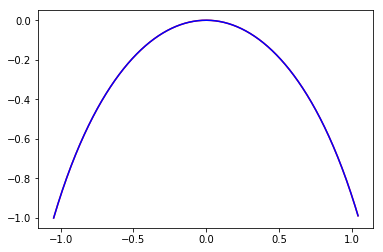

In [17]:
x = np.arange(-math.pi/3, math.pi/3, .01)
y = polynom.val(x)

plt.plot(x, y,'r',x,f(x),'b')

In [10]:
points

array([-1.04719755, -0.34906585,  0.34906585,  1.04719755])

In [11]:
coefs

array([[-1.00000000e+00,  1.30385259e+00, -9.33815630e-01,
         1.06018489e-16],
       [            nan, -8.97391753e-02, -2.38541601e-16,
        -9.33815630e-01],
       [            nan,             nan, -8.97391753e-02,
        -1.30385259e+00],
       [            nan,             nan,             nan,
        -1.00000000e+00]])